In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
from timeit import default_timer as timer
import os
import altair as alt
alt.renderers.enable('notebook')

sns.set(style="darkgrid")
%matplotlib inline

In [6]:
data_path = os.path.abspath('../../../../../data/analysis/')
file = os.path.join(data_path, 'R0_VH_R1aafreq.csv')
df = pd.read_csv(file)



,cdr3,quantity,length,MW,AV,IP,flex,gravy,SSF_Helix,SSF_Turn,...,%T,%V,%W,%Y,aliphatic,aromatic,neutral,positive,negative,invalid
0,FIVESK,6655,6,721.8413,0.1667,6.0014,0.7368,0.5500,0.5000,0.1667,...,0.0000,0.1667,0.0000,0.0000,2,1,1,1,1,0
1,DLGIPDDY,1912,8,906.9324,0.1250,3.4228,0.7723,-0.6875,0.3750,0.2500,...,0.0000,0.0000,0.0000,0.1250,4,1,0,0,3,0
2,EMWGPEY,988,7,910.9889,0.2857,3.7950,0.7594,-1.3286,0.2857,0.2857,...,0.0000,0.0000,0.1429,0.1429,3,2,0,0,2,0
3,EMWGPDY,594,7,896.9623,0.2857,3.6660,0.7563,-1.3286,0.2857,0.2857,...,0.0000,0.0000,0.1429,0.1429,3,2,0,0,2,0
4,ETWGPEH,173,7,854.8629,0.1429,4.5075,0.7977,-1.9714,0.1429,0.2857,...,0.1429,0.0000,0.1429,0.0000,2,1,1,1,2,0


R0_VH_R1aafreq.csv


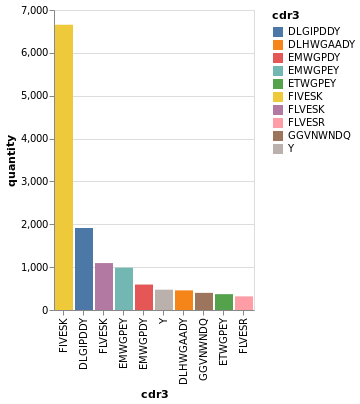

R0_VH_S1_L001_R1_001aafreq.csv


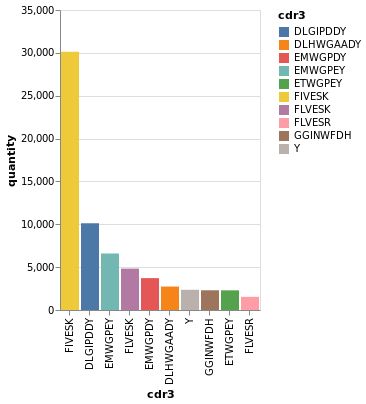

R1a_VH_S2_L001_R1_001aafreq.csv


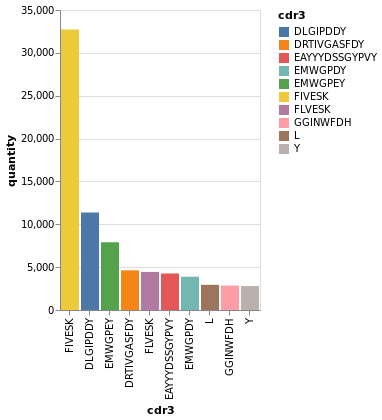

R1b_VH_S3_L001_R1_001aafreq.csv


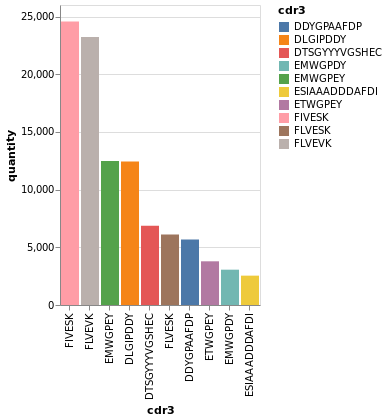

R2a_VH_S4_L001_R1_001aafreq.csv


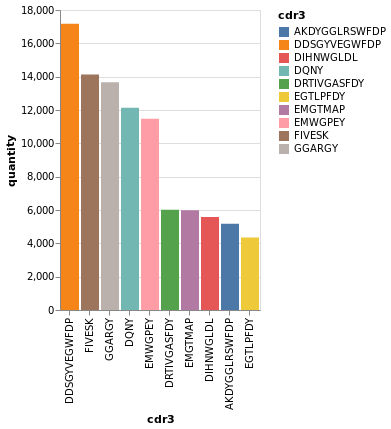

R2b_VH_S5_L001_R1_001aafreq.csv


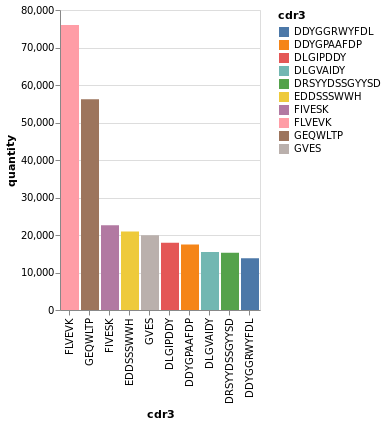

R3a_VH_S6_L001_R1_001aafreq.csv


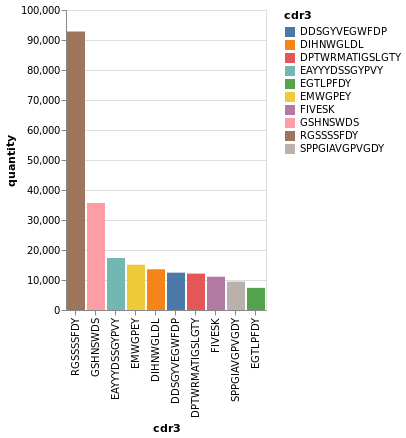

R3b_VH_S7_L001_R1_001aafreq.csv


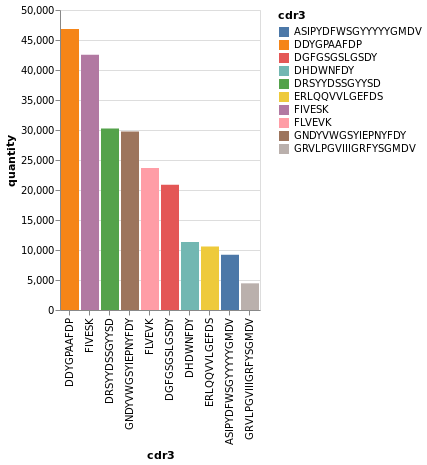

R4a_VH_S8_L001_R1_001aafreq.csv


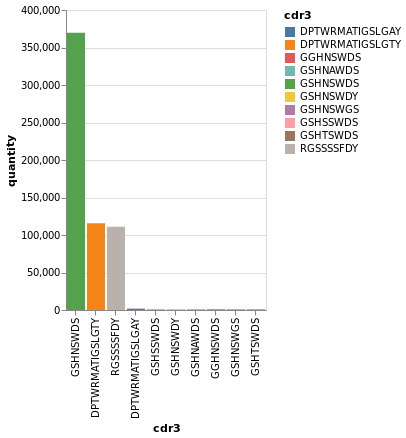

R4b_VH_S9_L001_R1_001aafreq.csv


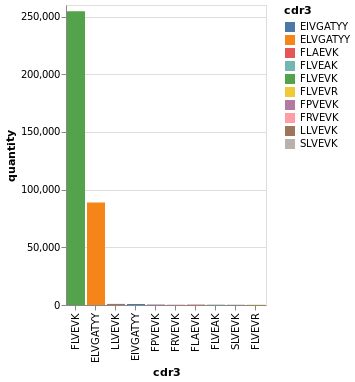

R5b_VH_S10_L001_R1_001aafreq.csv


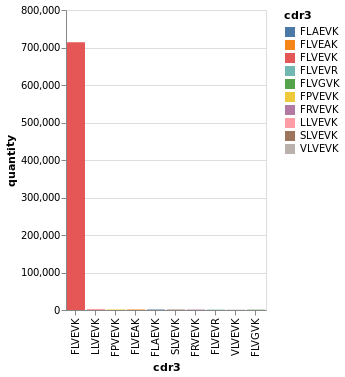

In [48]:
for f in sorted(os.listdir(data_path)):
    if f.endswith('csv') and f.startswith('R') and os.path.getsize(os.path.join(data_path, f)) >= 1000:
        print(f)
        df = pd.read_csv(os.path.join(data_path, f))
        cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
        alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white').display()
#         print(os.path.getsize(os.path.join(data_path, f)))

In [ ]:
R0_VH_S1_L001_R1_001aafreq.csv
cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white')

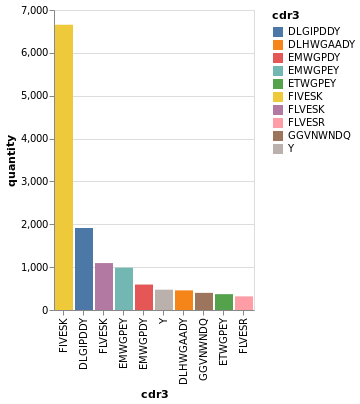

In [33]:
cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white')

In [26]:
cdr_top_10.head()
list(cdr_top_10['cdr3'].sort_values())

['DLGIPDDY',
 'DLHWGAADY',
 'EMWGPDY',
 'EMWGPEY',
 'ETWGPEY',
 'FIVESK',
 'FLVESK',
 'FLVESR',
 'GGVNWNDQ',
 'Y']

In [7]:
appear_most = df.loc[sorted(df['quantity'], reverse=True)[:5]]

appear_most

,cdr3,quantity,length,MW,AV,IP,flex,gravy,SSF_Helix,SSF_Turn,...,%T,%V,%W,%Y,aliphatic,aromatic,neutral,positive,negative,invalid
6655,DDQGYSGYDLSLAY,1,14,1566.5766,0.2143,3.4228,0.7502,-0.7786,0.3571,0.2857,...,0.0000,0.0000,0.0,0.2143,5,3,3,0,3,0
1912,SDYLKTFDY,5,9,1151.2214,0.3333,4.2068,0.7327,-0.9333,0.4444,0.1111,...,0.1111,0.0000,0.0,0.2222,1,3,2,1,2,0
1095,RVKYGSGSYDFDY,2,13,1556.6297,0.3077,5.9583,0.7421,-1.1308,0.3846,0.3077,...,0.0000,0.0769,0.0,0.2308,3,4,2,2,2,0
988,AFYDSNGYYDY,3,11,1377.3658,0.4545,3.5637,0.7125,-1.1182,0.4545,0.2727,...,0.0000,0.0000,0.0,0.3636,2,5,2,0,2,0
594,SQRGWKWGHS,2,10,1228.3188,0.2000,11.0003,0.7752,-1.9300,0.2000,0.4000,...,0.0000,0.0000,0.2,0.0000,2,2,3,3,0,0


In [58]:
data_path = os.path.abspath('../../../../../data/analysis/')
files = os.listdir(data_path)
files.sort()
for file in files:
#     try:
    if file.endswith('.csv') and file.startswith('VCL'):
        df = pd.read_csv(f'{data_path}/{file}')
        data = df[['cdr3', 'quantity', 'length', 'aromatic', 'positive', 'negative']]
#         a = data.cdr3.loc[:10][:10]
#         d = []
#         for s in a:
#             d.append(f'''(data.cdr3 == \'{s}\')''')
#         g = r' | '.join(d)
#         print(g)
        print(file)
        print(data.iloc[0:10])
        print('\n')
#         print(data.loc[(data.cdr3 == 'FIVESK')])
#         print(data.loc[g])
    print('\n\n')
#         df = pd.

VCL29VHR0_S1_L001_R1_001aafreq.csv
                     cdr3  quantity  length  aromatic  positive  negative
0                  FIVESK     13326       6         1         1         1
1               MGIAVTIDY      6749       9         1         0         1
2                       P      6104       1         0         0         0
3  DHEGVPTYYDFWSGYYNGWFDP      3795      22         8         1         4
4            PFYDSGSYYFDY      3409      12         6         0         2
5               DLHWGAVDY      3237       9         2         1         2
6                 QQMALDY      2962       7         1         0         1
7          EEYDFWSGYSPMDV      2781      14         4         0         4
8               GYSSGWYDY      3035       9         4         0         1
9             DLKGLWYNFDY      2492      11         4         1         2





VCL29VHR3_S3_L001_R1_001aafreq.csv
                  cdr3  quantity  length  aromatic  positive  negative
0        GPPHPNYYYHMDV     12113      13



VCL29VHR0_S1_L001_R1_001aafreq.csv


                     cdr3  quantity  length         MW      AV      IP  \
0                  FIVESK     13326       6   721.8413  0.1667  6.0014   
1               MGIAVTIDY      6749       9   982.1512  0.1111  3.7994   
2                       P      6104       1   115.1305  0.0000  5.9550   
3  DHEGVPTYYDFWSGYYNGWFDP      3795      22  2715.7901  0.3636  3.8361   
4            PFYDSGSYYFDY      3409      12  1523.5516  0.5000  3.5637   

     flex   gravy  SSF_Helix  SSF_Turn  ...      %T      %V      %W      %Y  \
0  0.7368  0.5500     0.5000    0.1667  ...  0.0000  0.1667  0.0000  0.0000   
1  0.6879  1.2222     0.4444    0.1111  ...  0.1111  0.1111  0.0000  0.1111   
2  0.8660 -1.6000     0.0000    1.0000  ...  0.0000  0.0000  0.0000  0.0000   
3  0.7348 -1.0818     0.4091    0.3182  ...  0.0455  0.0455  0.0909  0.1818   
4  0.7149 -0.8500     0.5000    0.3333  ...  0.0000  0.0000  0.0000  0.3333   

   aliphatic  aromatic  neutral  positive

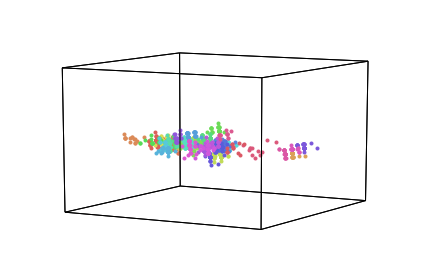

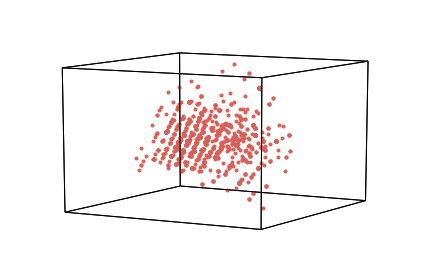

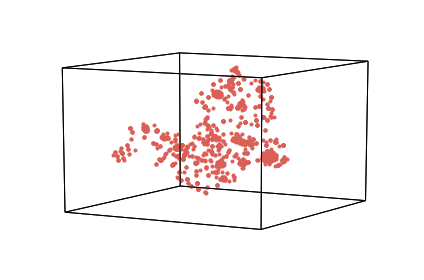

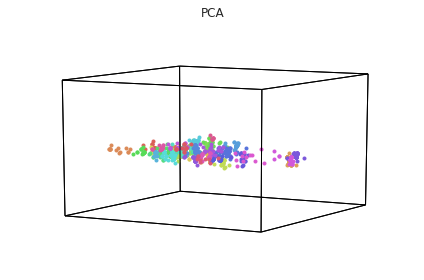

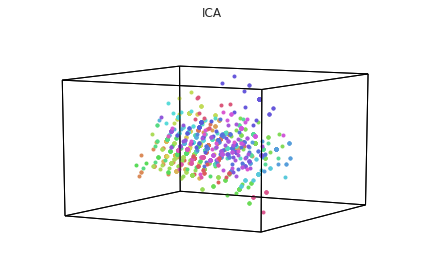

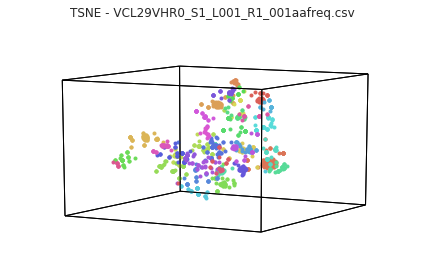

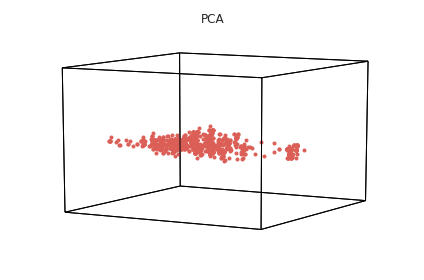

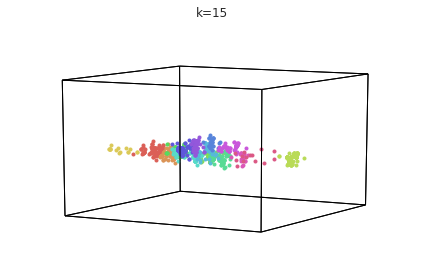

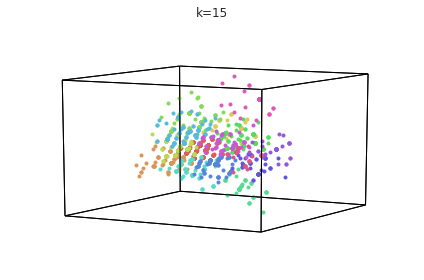

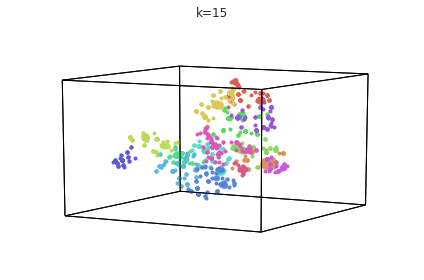



VCL29VHR3_S3_L001_R1_001aafreq.csv


                  cdr3  quantity  length         MW      AV       IP    flex  \
0        GPPHPNYYYHMDV     12113      13  1589.7274  0.2308   5.9686  0.7353   
1           AYPEWGVIDY      8591      10  1212.3060  0.3000   3.6660  0.7144   
2    GRRGSLAVAGSRKAFDV      4233      17  1746.9677  0.0588  11.7114  0.7557   
3               FIVESK      5195       6   721.8413  0.1667   6.0014  0.7368   
4  RYRNYYDSSGYSGYNWFDP      3384      19  2410.4661  0.3684   5.9576  0.7442   

    gravy  SSF_Helix  SSF_Turn  ...   %T      %V      %W      %Y  aliphatic  \
0 -1.2615     0.3077    0.3846  ...  0.0  0.0769  0.0000  0.2308          6   
1 -0.2000     0.5000    0.2000  ...  0.0  0.1000  0.1000  0.2000          5   
2 -0.1941     0.2353    0.2941  ...  0.0  0.1176  0.0000  0.0000          9   
3  0.5500     0.5000    0.1667  ...  0.0  0.1667  0.0000  0.0000          2   
4 -1.7053     0.3684    0.4211  ...  0.0  0.0000  0.0526  0.2632          3   

   ar

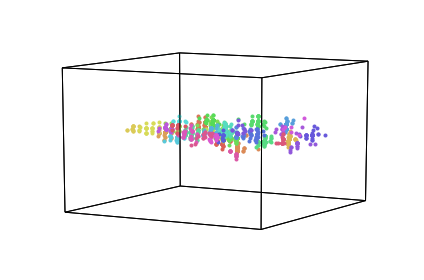

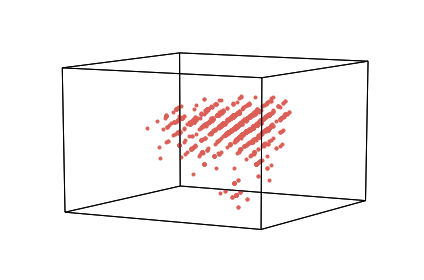

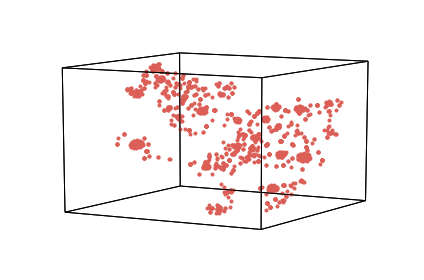

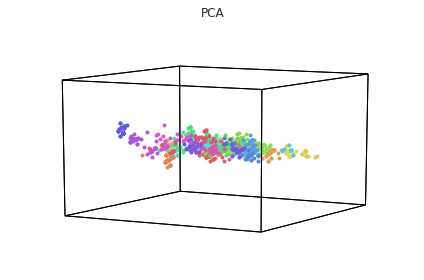

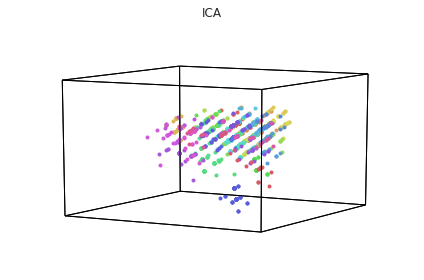

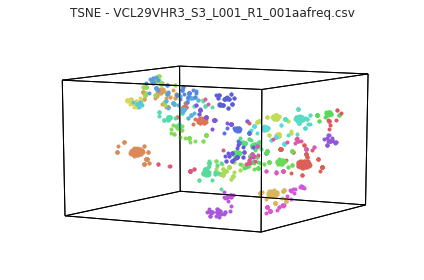

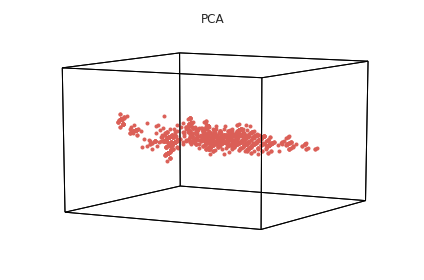

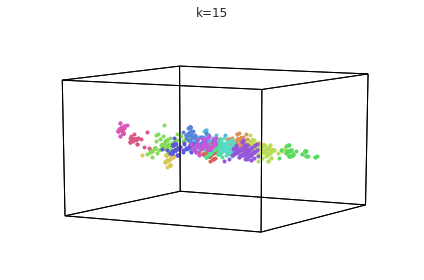

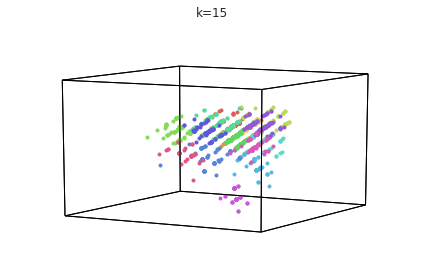

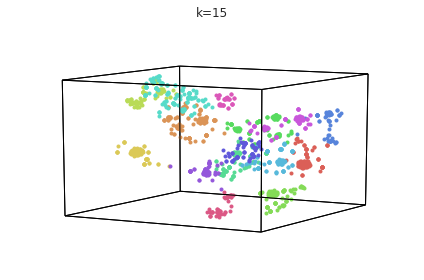



VCL29VHR4_S4_L001_R1_001aafreq.csv


                cdr3  quantity  length         MW      AV       IP    flex  \
0      GPPHPNYYYHMDV     23551      13  1589.7274  0.2308   5.9686  0.7353   
1         AYPEWGVIDY     21041      10  1212.3060  0.3000   3.6660  0.7144   
2           GGVNWHDK     18543       8   911.9604  0.1250   6.7436  0.7709   
3          DLHNWGLDY     18816       9  1132.1816  0.2222   4.1967  0.7386   
4  GRRGSLAVAGSRKAFDV     14005      17  1746.9677  0.0588  11.7114  0.7557   

    gravy  SSF_Helix  SSF_Turn  ...   %T      %V      %W      %Y  aliphatic  \
0 -1.2615     0.3077    0.3846  ...  0.0  0.0769  0.0000  0.2308          6   
1 -0.2000     0.5000    0.2000  ...  0.0  0.1000  0.1000  0.2000          5   
2 -1.4500     0.2500    0.3750  ...  0.0  0.1250  0.1250  0.0000          3   
3 -0.9667     0.4444    0.2222  ...  0.0  0.0000  0.1111  0.1111          3   
4 -0.1941     0.2353    0.2941  ...  0.0  0.1176  0.0000  0.0000          9   

   aromatic  neut

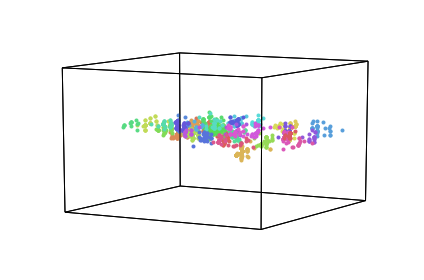

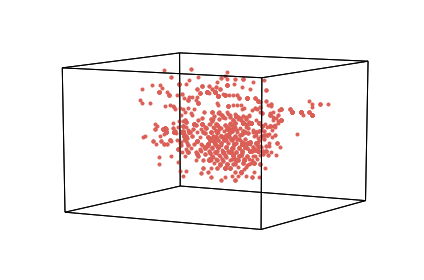

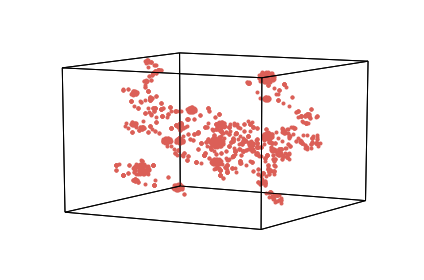

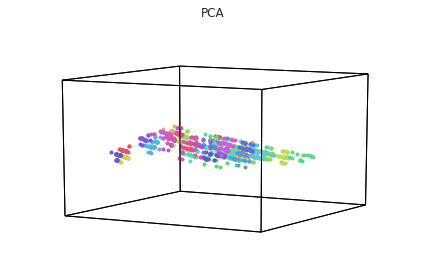

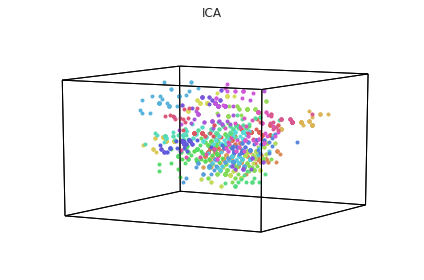

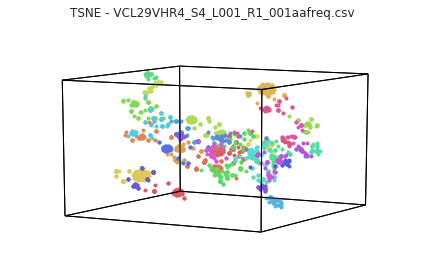

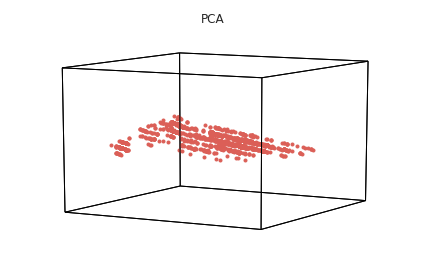

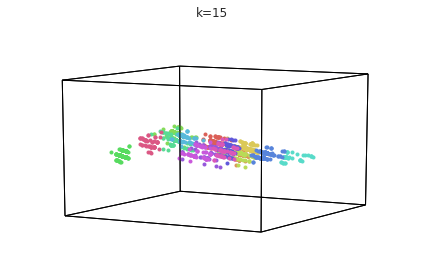

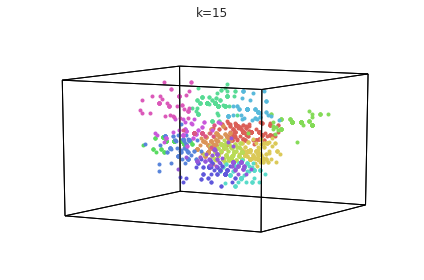

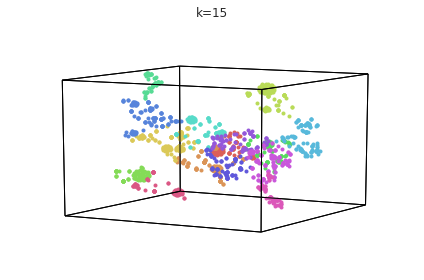

In [3]:
data_path = os.path.abspath('../../../../../attila_data/analysis/29/')
files = os.listdir(data_path)
files.sort()
for file in files:
    if file.endswith('.csv') and file.startswith('VCL'):
#         start = timer()
#         print(file)
        df = pd.read_csv(f'{data_path}/{file}')
        print('\n\n'+file+'\n\n')
        print(df.head())
        print('\n\n')
        data = df[['length', 'aromatic', 'positive', 'negative']]
#         data.head()
        hyp.plot(data, '.', n_clusters=37)
        cluster_labels = hyp.cluster(data, n_clusters=37) 
        geo_ica = hyp.plot(data, '.', reduce='FastICA',  ndims=3)
        geo_tsne = hyp.plot(data, '.', reduce='TSNE', ndims=3)
        geo = hyp.plot(data, '.', group=cluster_labels, reduce='PCA', title='PCA')
        geo_ica.plot(group=cluster_labels, legend=None, title='ICA')
        hyp.plot(data, '.', reduce='TSNE', ndims=3, group=cluster_labels, legend=None, title=f'TSNE - {file}')
        geo = hyp.plot(data, '.', reduce='PCA', title='PCA')
        ks = [3,6,9,12,15]
        for k in ks[4:]:
            geo.plot(n_clusters=k, title='k=' + str(k))
        for k in ks[4:]:
            geo_ica.plot(n_clusters=k, title='k=' + str(k))
        for k in ks[4:]:
            geo_tsne.plot(n_clusters=k, title='k=' + str(k))
#         print(f'\nElapsed time for {file}: {timer()-start:0.4f}\n\n\n')
#         print("="*120)

In [4]:
data_path = os.path.abspath('../../../../../attila_data/')
files = os.listdir(data_path)
print(files)

['R4pep_VH_R1aafreq.csv', 'cd20rafaR0aafreq.txt', 'VCL66VHR0_S5_L001_R1_001aafreq.csv', 'VCL29VHR0_S1_L001_R1_001aafreq.ods', 'VCL66VHR4_S8_L001_R1_001aafreq.ods', 'gal29R0aafreq.csv', 'VCL66VHR0_S5_L001_R1_001aafreq.txt', 'VCL66VHR2_S6_L001_R1_001aafreq.txt', 'gal66R0aafreq.csv', 'VCL66VHR3_S7_L001_R1_001aafreq.txt', 'VCL66VHR3_S7_L001_R1_001aafreq.csv', 'VCL29VHR4_S4_L001_R1_001aafreq.csv', 'zikaR0aafreq.csv', 'VCL66VHR4_S8_L001_R1_001aafreq.csv', 'R4ac_VH_R1aafreq.ods', 'gal66R0aafreq.txt', 'Renato_zika_acido_R0_VH_R1aafreq-TEST.txt', 'rafaCD20_Vh_R0_R1aafreq.txt', 'Renato_zika_acido_R0_VH_R1aafreq.csv', 'Renato__zika_R0_VH_R1aafreq.txt', 'VCL66VHR2_S6_L001_R1_001aafreq.ods', 'VCL29VHR2_S2_L001_R1_001aafreq.ods', 'R4pep_VH_R1aafreq.txt', 'Renato_zika_acido_R0_VH_R1aafreq.txt', 'tmp.py', 'Renato__zika_R0_VH_R1aafreq.csv', 'R4ac_VH_R1aafreq.csv', 'doc_2019-07-15_21-21-21._rafaCD20_Vh_R0_R1aafreq.txt', 'analysis', 'VCL29VHR3_S3_L001_R1_001aafreq.csv', 'VCL29VHR2_S2_L001_R1_001aafreq.cs